<a href="https://colab.research.google.com/github/Zarif123/SSLM-Project/blob/main/chess_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Setting Up Colab

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
folder = "/content/gdrive/MyDrive/Statistical_LM_Group_Folder"

csv_file = "chess_data.csv"
csv_path = f"{folder}/{csv_file}"

Mounted at /content/gdrive


### Imports

In [8]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

### ELO Buckets

In [3]:
def rating_to_bracket(rating):
  if rating < 1300:
    return 0
  elif rating >= 1300 and rating < 1500:
    return 1
  elif rating >= 1500 and rating < 1700:
    return 2  
  elif rating >= 1700 and rating < 1900:
    return 3
  elif rating >= 1900 and rating < 2100:
    return 4
  elif rating >= 2100:
    return 5

In [4]:
chess_data = pd.read_csv(csv_path)
chess_data["Bucket"] = chess_data["Elo"].map(lambda elo: rating_to_bracket(elo))

### Read To DataFrame

In [5]:
ratings = chess_data['Bucket']
rating_counts = ratings.value_counts().sort_index()
print(rating_counts)

0     5579
1    14556
2    24971
3    25064
4    13320
5     4208
Name: Bucket, dtype: int64


### Original Ratings Plot

Text(0, 0.5, 'Count')

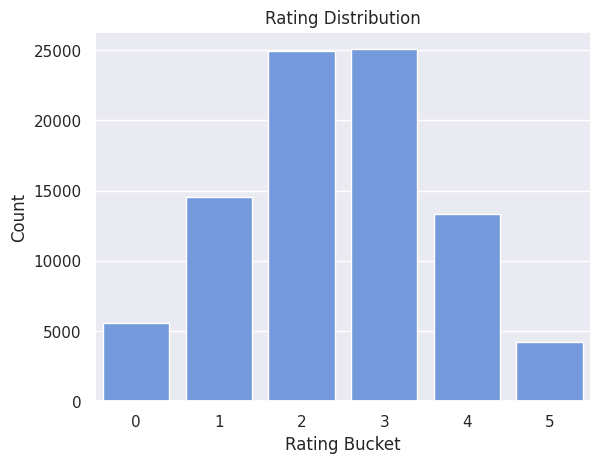

In [7]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x=chess_data["Bucket"], color="cornflowerblue")
plt.title("Rating Distribution")
plt.xlabel("Rating Bucket")
plt.ylabel("Count")

### Balancing Data

In [10]:
X = chess_data["Moves"]
y = chess_data["Bucket"]

balancer = RandomUnderSampler()
X = X.values.reshape(-1, 1)
X, y = balancer.fit_resample(X, y)

### Balanced Rating Plot

Text(0, 0.5, 'Count')

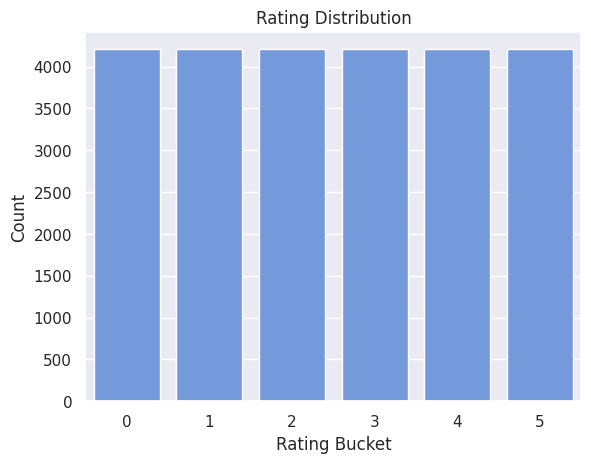

In [11]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x=y, color="cornflowerblue")
plt.title("Rating Distribution")
plt.xlabel("Rating Bucket")
plt.ylabel("Count")

In [ ]:
# chess_data.to_csv(f"{folder}/chess_data_with_buckets.csv", index=False)